# RNN APPROACH

In [12]:
import data_loader
import numpy as np
import keras
import seaborn as sns
import matplotlib.pyplot as plt
from keras import backend as K
from keras.models import Model,Sequential,load_model
from keras.layers import Dense,GRU,LSTM,Input,Lambda,Activation,Embedding,Merge,merge,RepeatVector
from keras.layers.wrappers import TimeDistributed

In [13]:
def rnn_generator(split,batch_size,n_epochs=1,test=False,partition=0):
    dl = data_loader.DataLoader(split,test=test)
    for ecal,target in dl.batch_iter(partition,batch_size,n_epochs):
        flat = np.array([[x[:,:,i].flatten() for i in range(x.shape[-1])] for x in ecal])
        X = flat[:,:-1,:]
        Y = flat[:,1:,:]
        P = np.zeros((Y.shape[0],2))
        P[np.arange(P.shape[0]),np.array([int(t[0]) for t in target])] = 1
        M = np.array([t[1] for t in target])
        X_dict = {'X_input': X,
                  'P_input': P,
                  'M_input': M}
        Y_dict = {'output': Y}
        yield (X_dict,Y_dict)

In [51]:
many = rnn_generator([90,10],10,n_epochs=1,test=True,partition=1)

In [45]:
saved_model = '../rnntest_model'
model = load_model(saved_model)

In [52]:
gold = []
pred = []
for m in many:
    gold.append([m[1].values()[0]])
    pred.append(model.predict(m[0]))

In [53]:
gold = [g[0] for g in gold]
gold = np.concatenate(gold,axis=0)
pred = np.concatenate(pred,axis=0)
print gold.shape, pred.shape

(10, 24, 400) (10, 24, 400)


In [54]:
10,20,20,24

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [61]:
foo = pred.reshape((10,20,20,24))
foo.shape

(10, 20, 20, 24)

In [73]:
#swap axes and reshape
gen = pred.swapaxes(1,2).reshape(10,20,20,24)

In [74]:
gen.shape

(10, 20, 20, 24)

In [18]:
for i in range(1):
    g = np.concatenate([np.reshape(gold[i,j,:],(1,20,20)) for j in range(gold.shape[1])],axis=0)
    p = np.concatenate([np.reshape(pred[i,j,:],(1,20,20)) for j in range(pred.shape[1])],axis=0)

In [63]:
np.swapaxes?

In [20]:
p.shape

(24, 20, 20)

0
----------------------


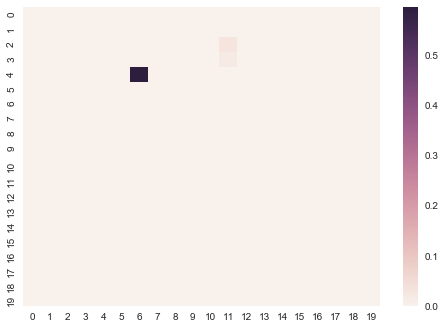

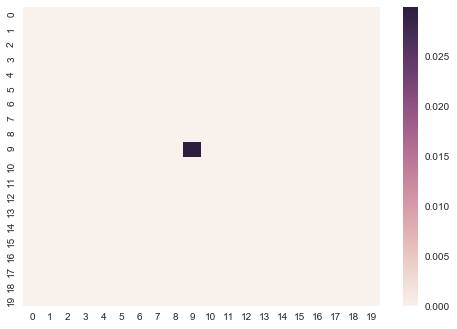

1
----------------------


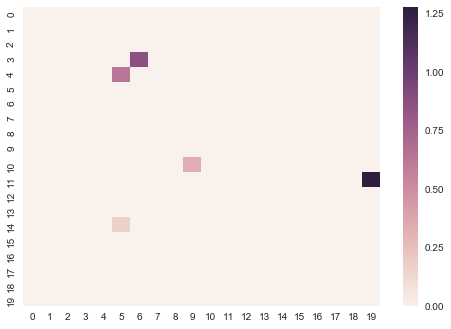

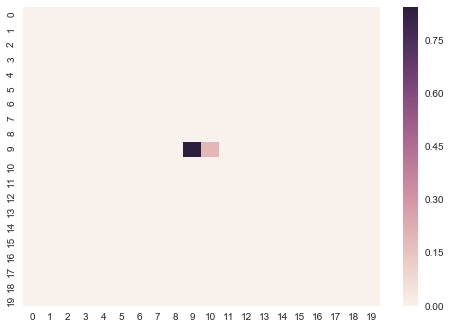

2
----------------------


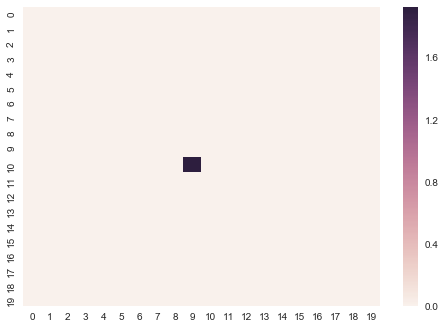

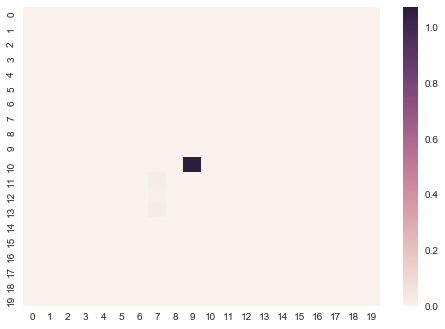

3
----------------------


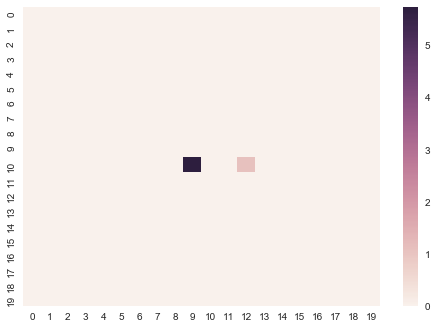

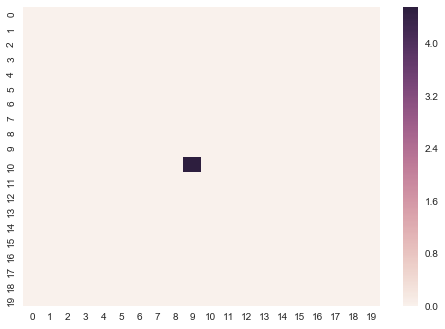

4
----------------------


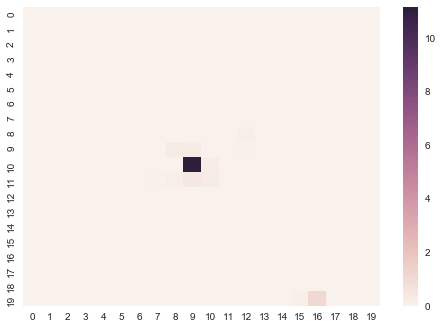

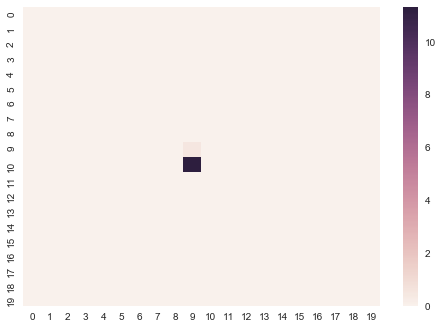

5
----------------------


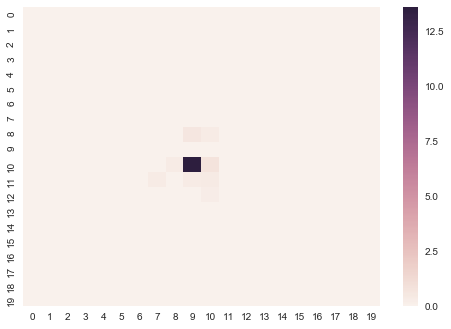

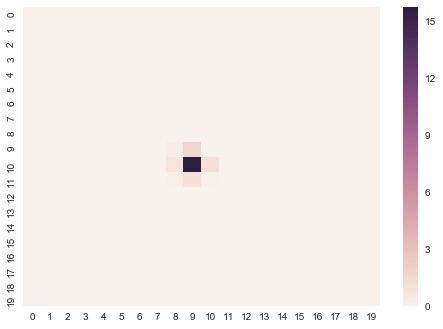

6
----------------------


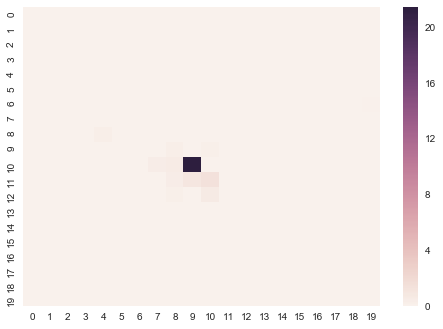

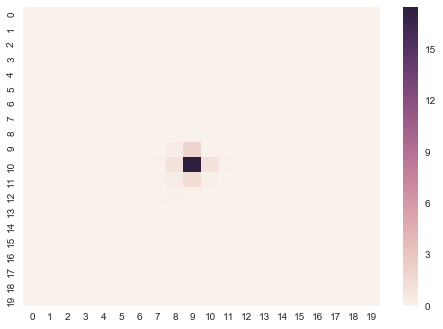

7
----------------------


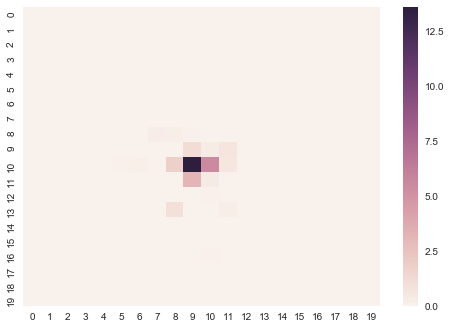

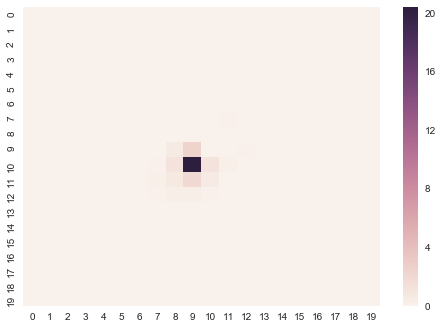

8
----------------------


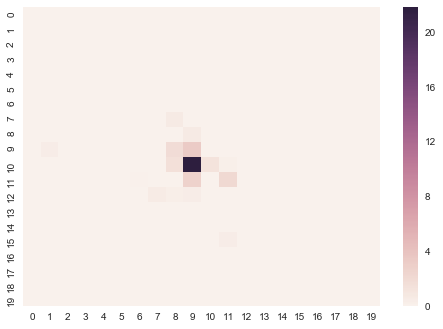

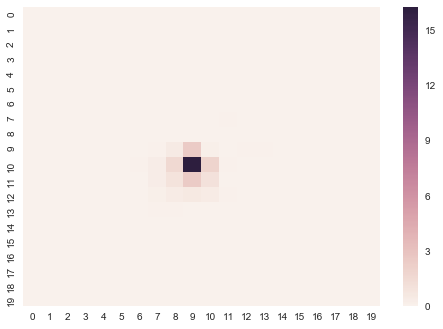

9
----------------------


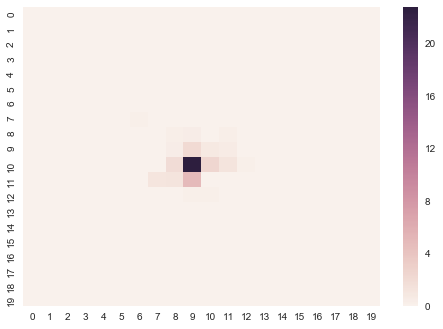

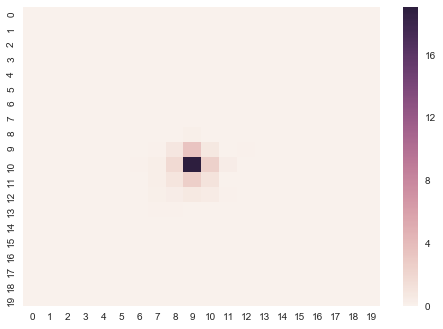

10
----------------------


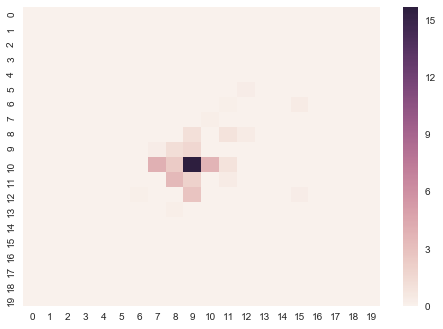

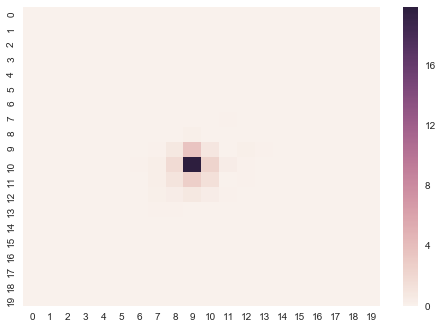

11
----------------------


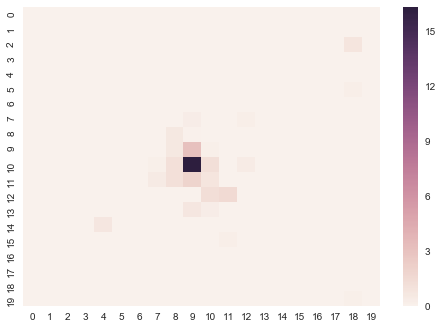

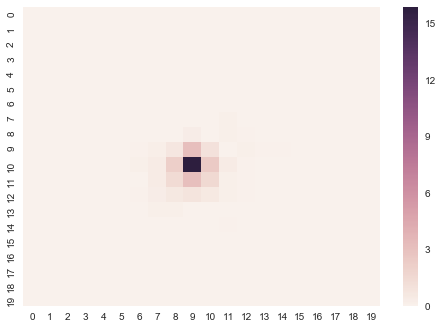

12
----------------------


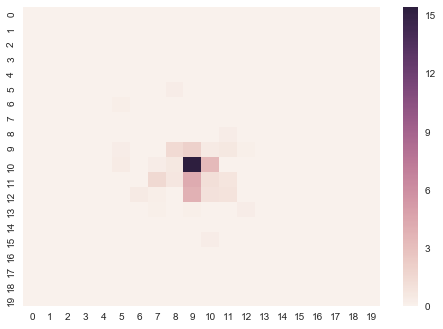

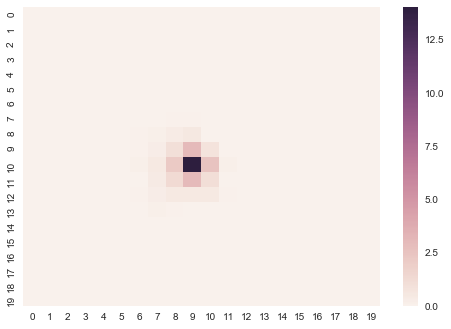

13
----------------------


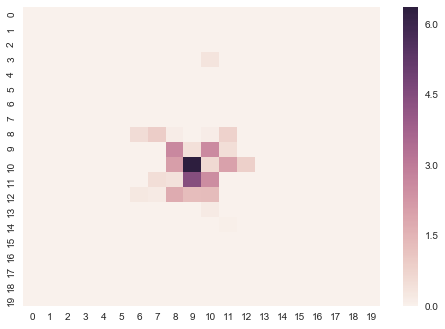

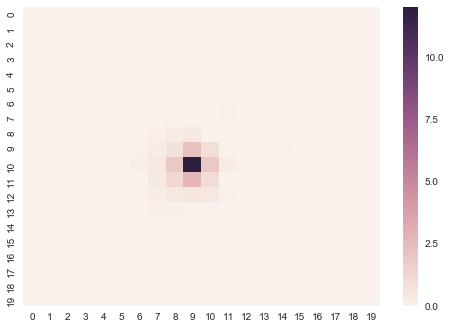

14
----------------------


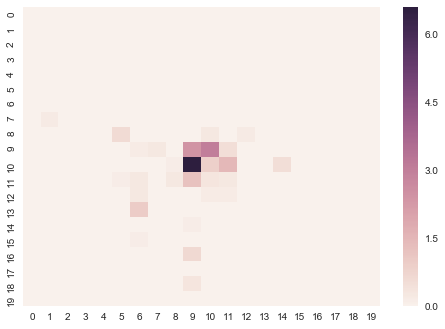

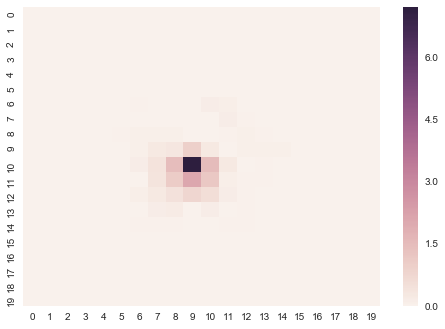

15
----------------------


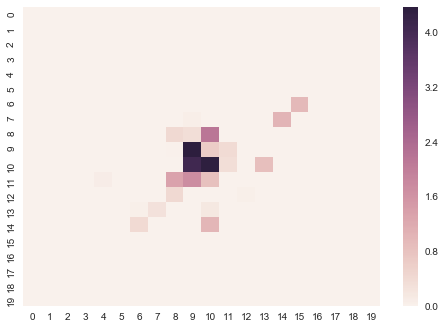

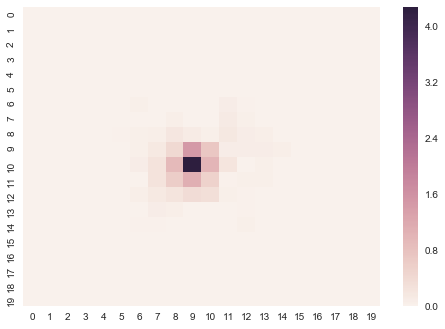

16
----------------------


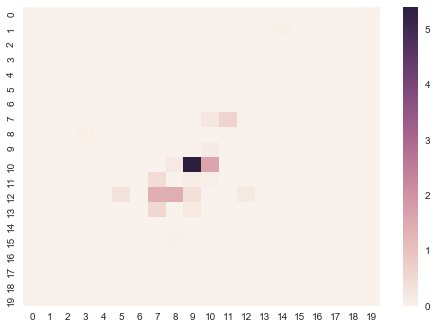

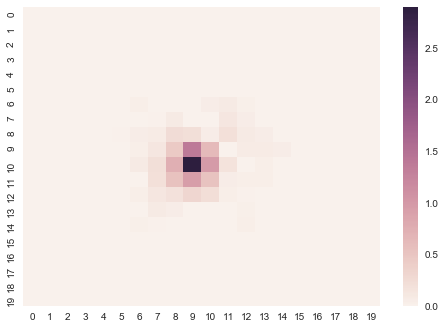

17
----------------------


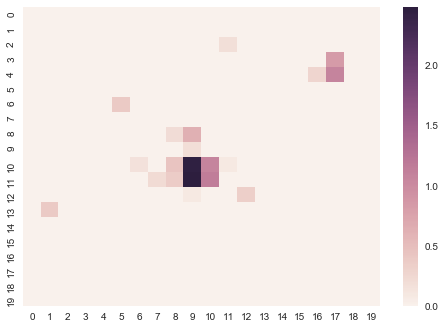

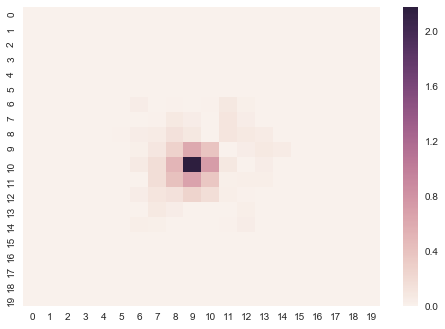

18
----------------------


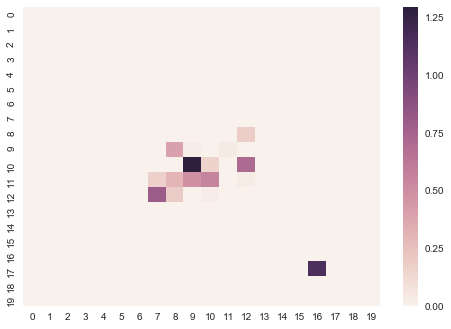

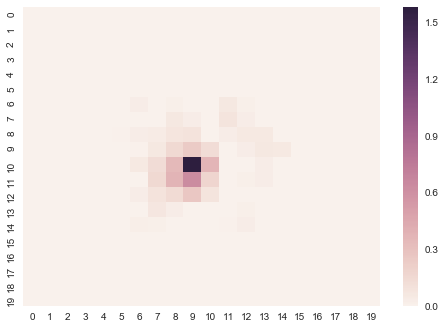

19
----------------------


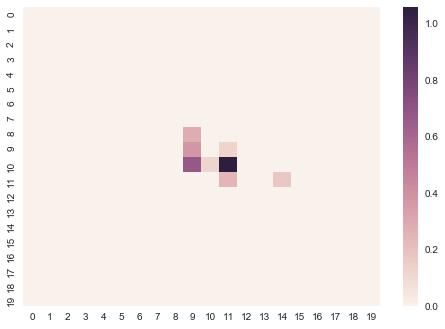

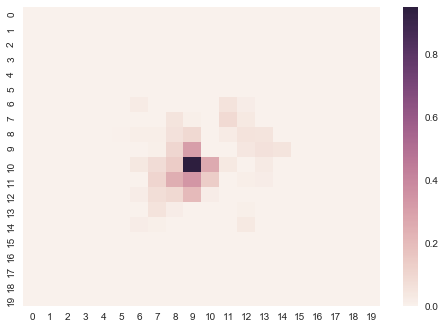

20
----------------------


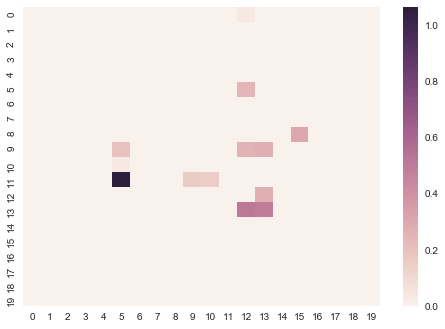

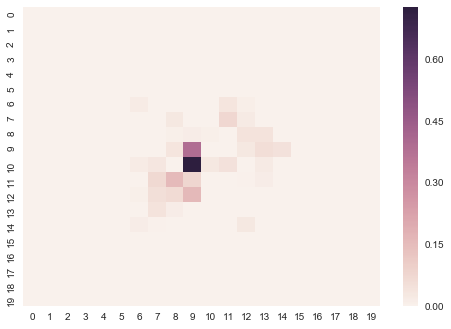

21
----------------------


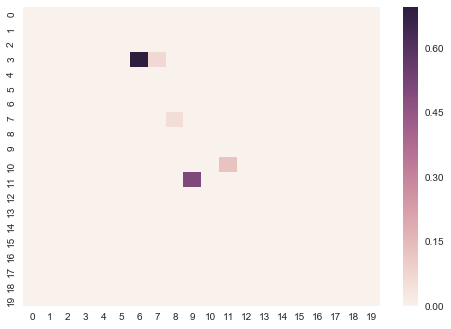

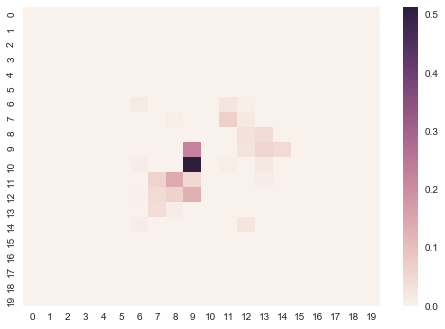

22
----------------------


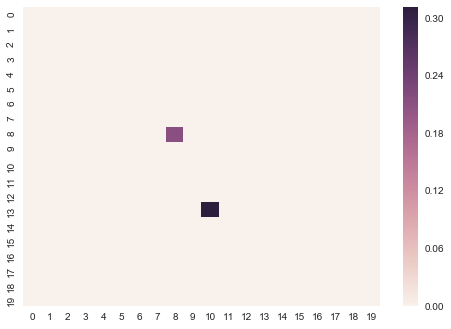

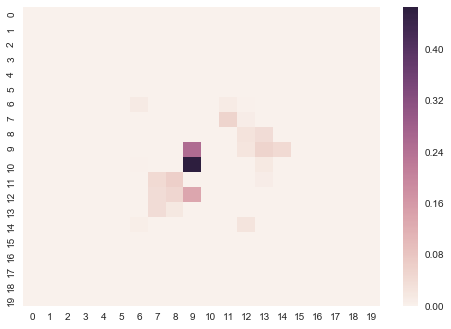

23
----------------------


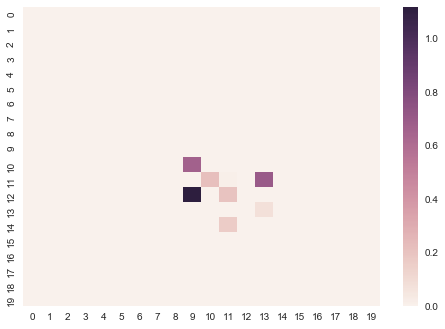

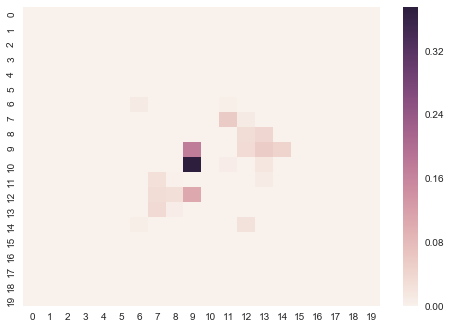

In [21]:
for j in range(p.shape[0]):
    print (j)
    print '----------------------'
    sns.heatmap(g[j])
    plt.show()
    sns.heatmap(p[j])
    plt.show()

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

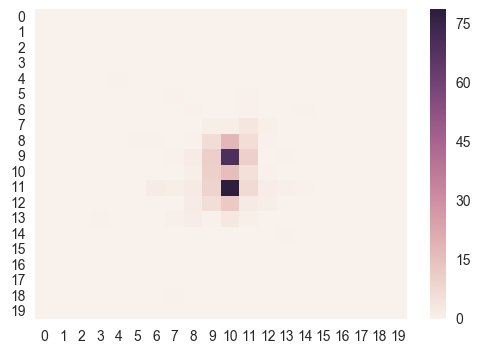

In [37]:
sns.heatmap(np.reshape(x['X_input'][0],(24,20,20))[12])

In [38]:
import viz_tools

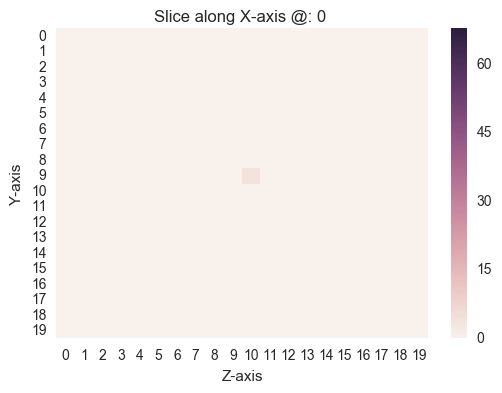

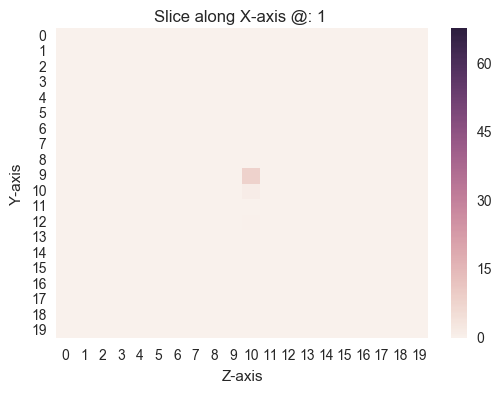

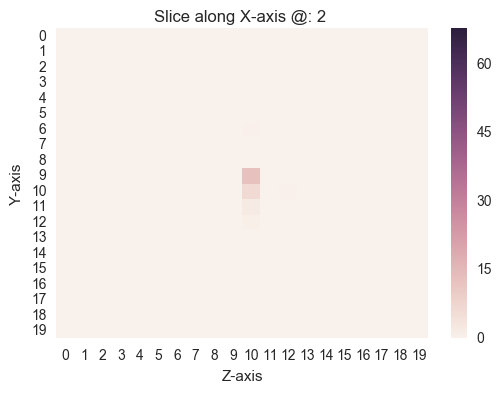

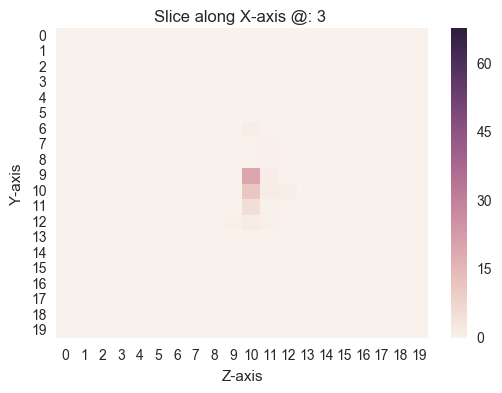

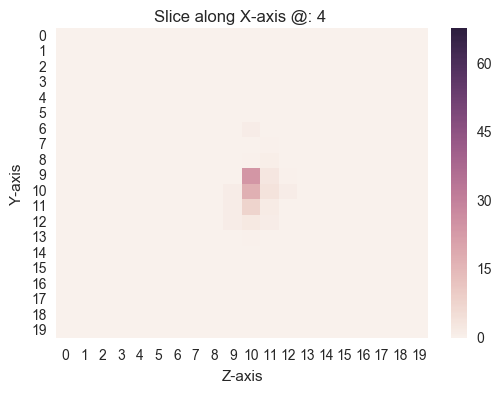

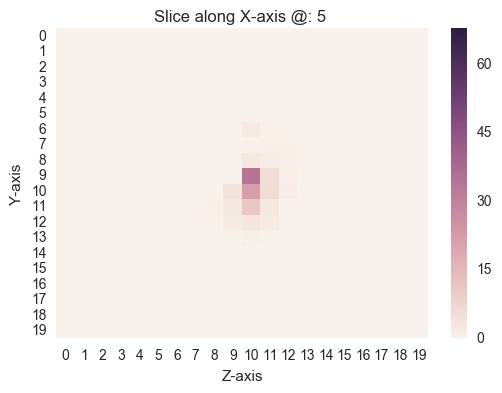

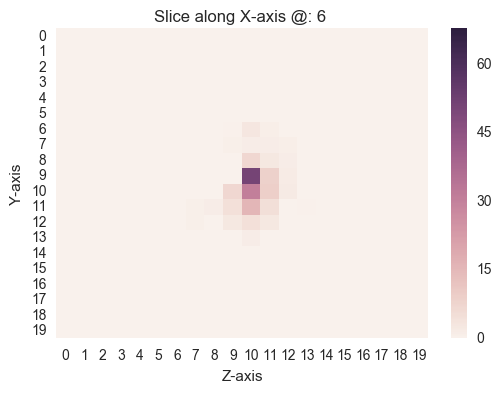

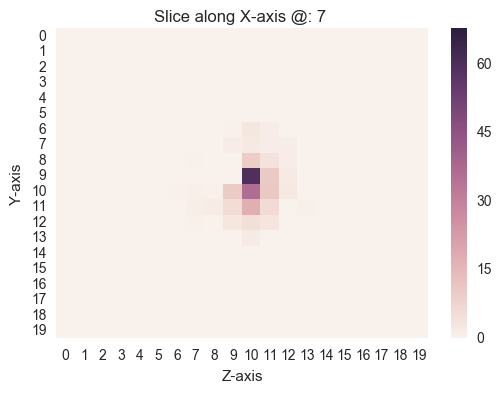

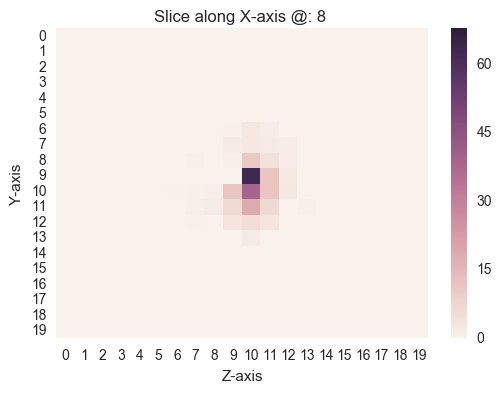

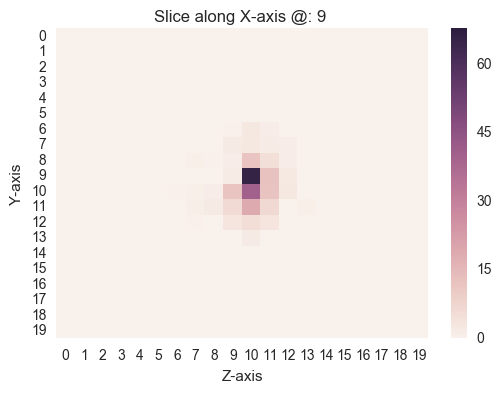

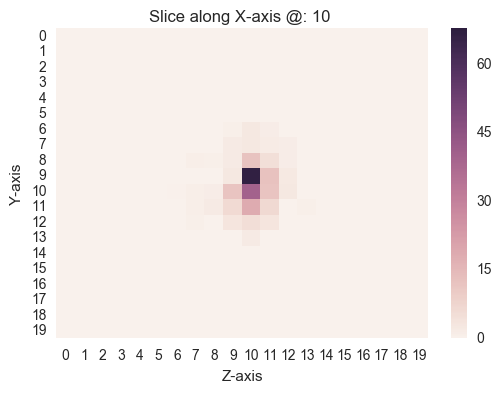

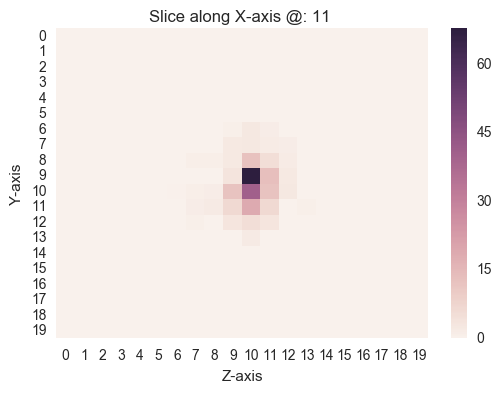

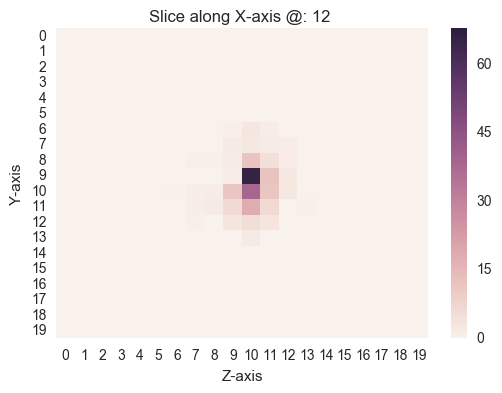

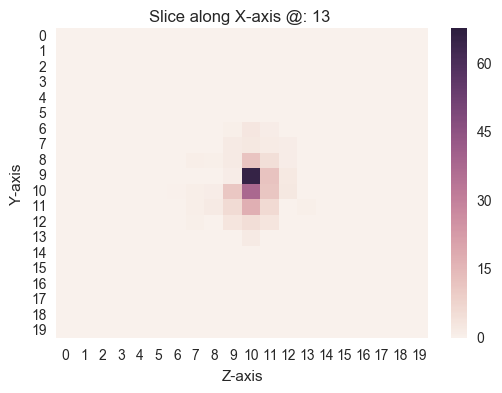

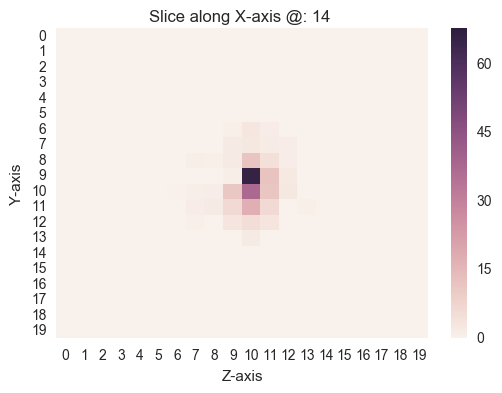

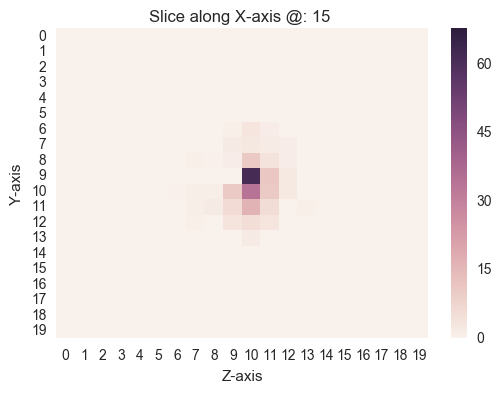

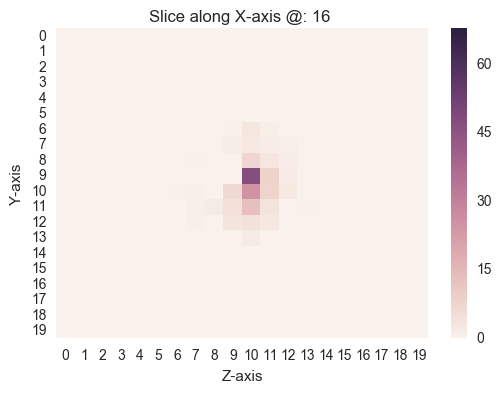

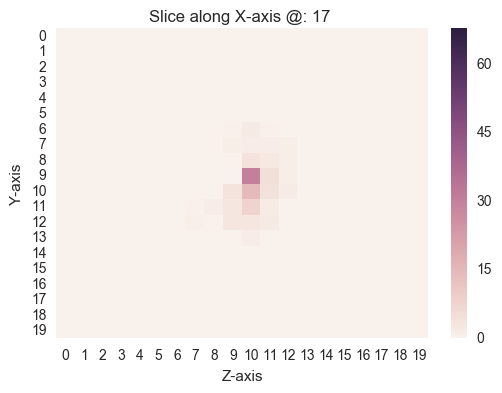

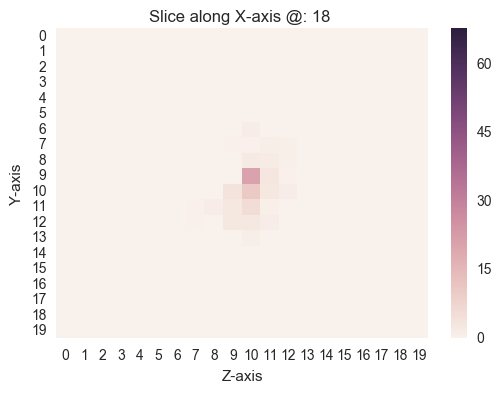

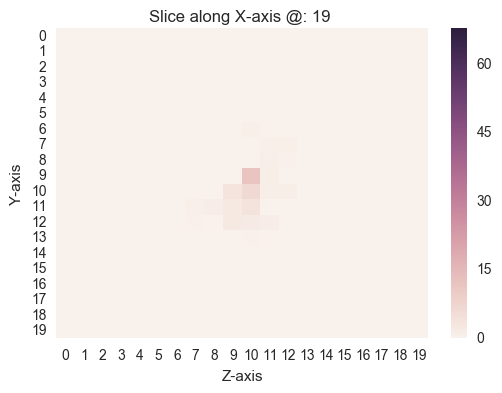

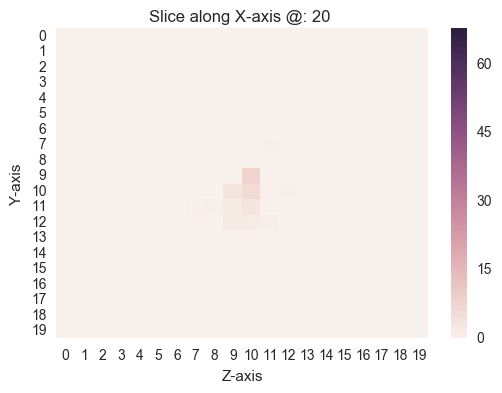

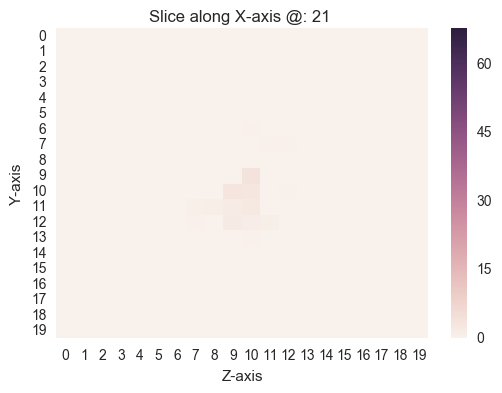

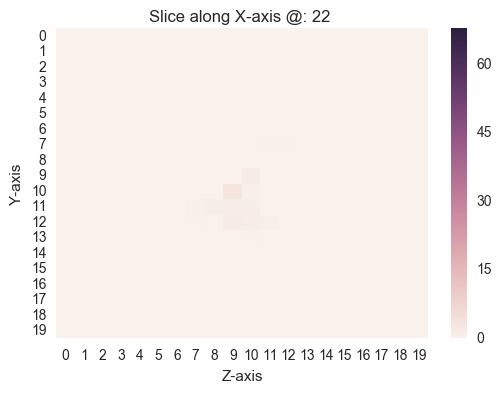

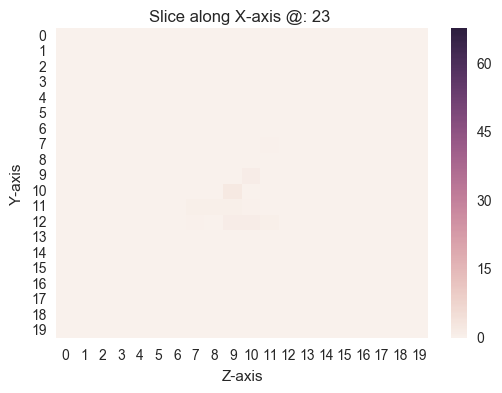

In [46]:
viz_tools.slice_axis_heatmap(p,0)


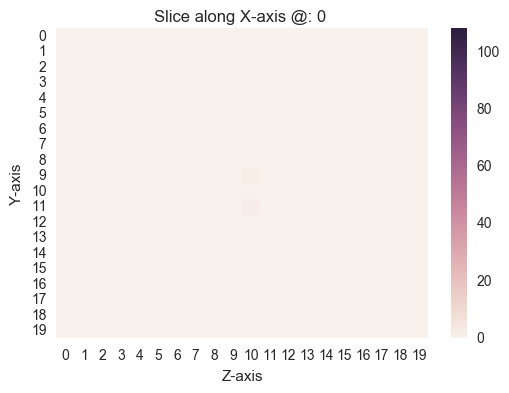

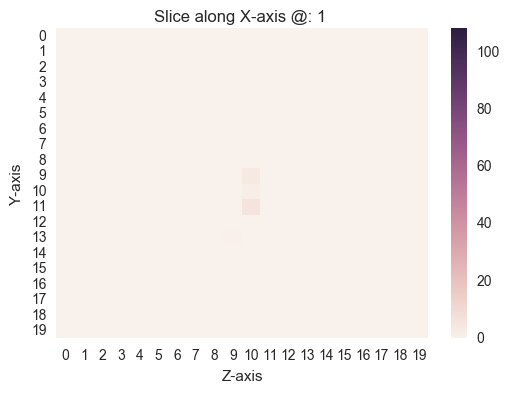

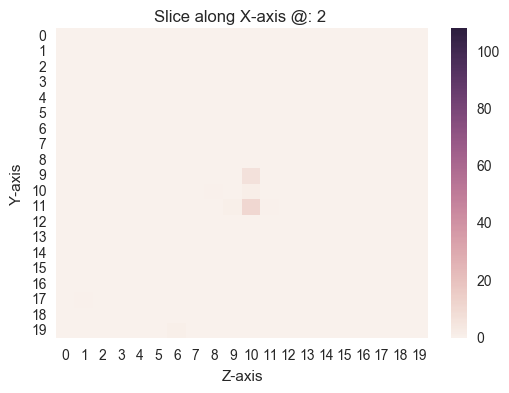

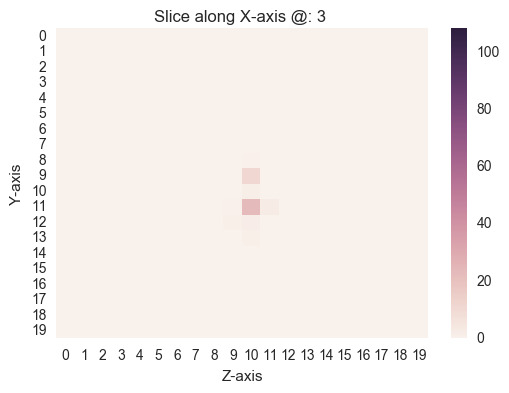

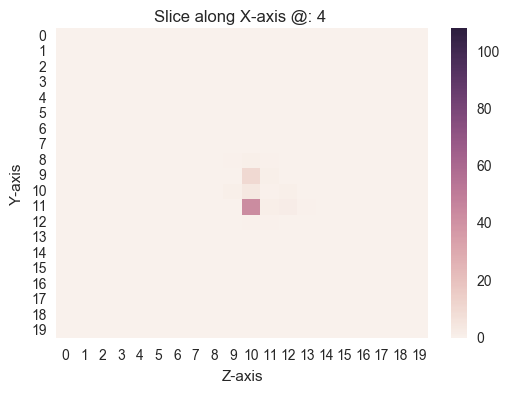

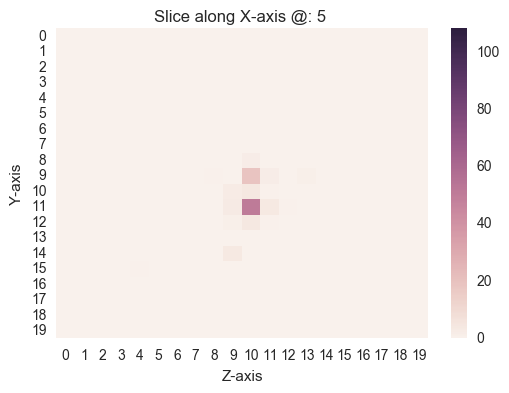

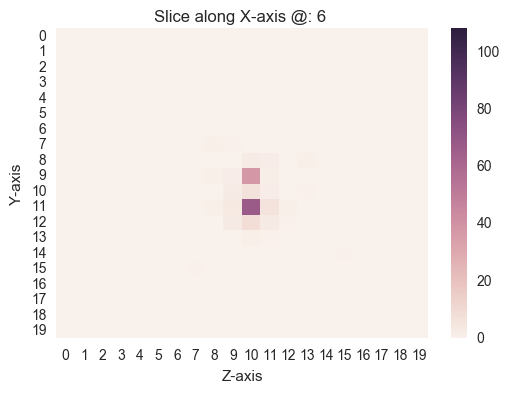

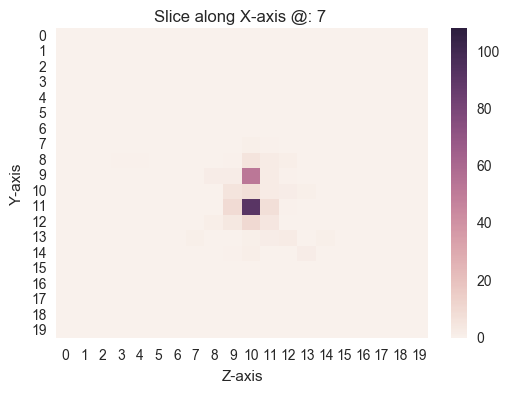

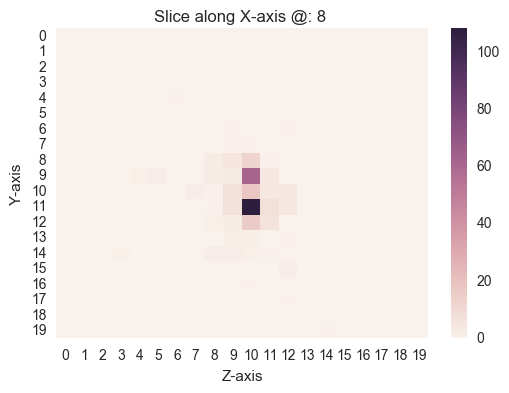

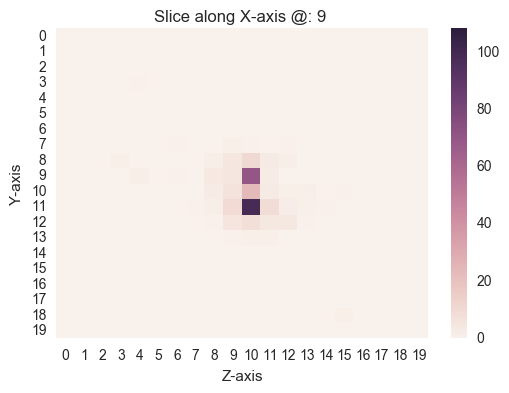

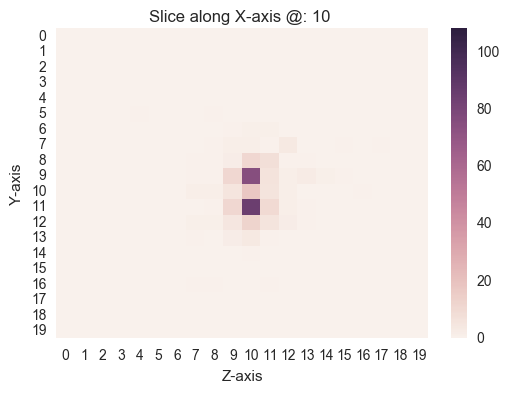

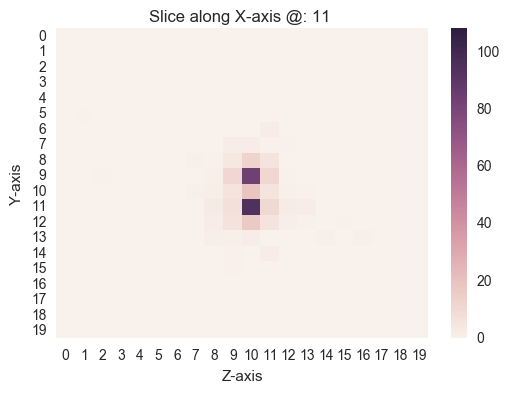

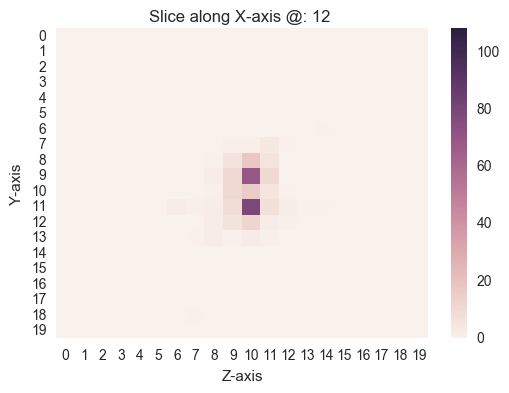

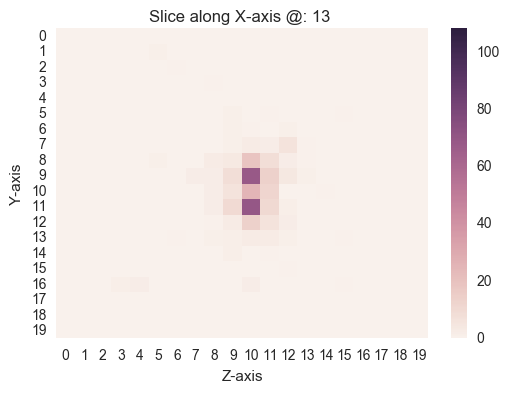

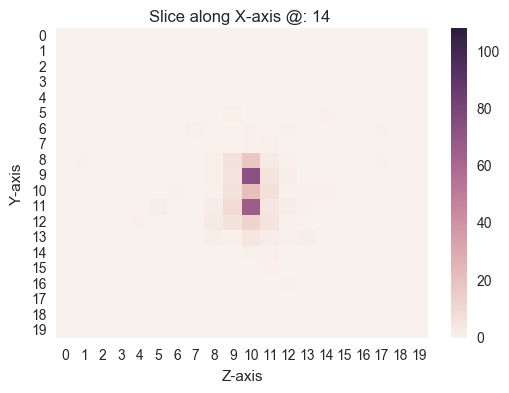

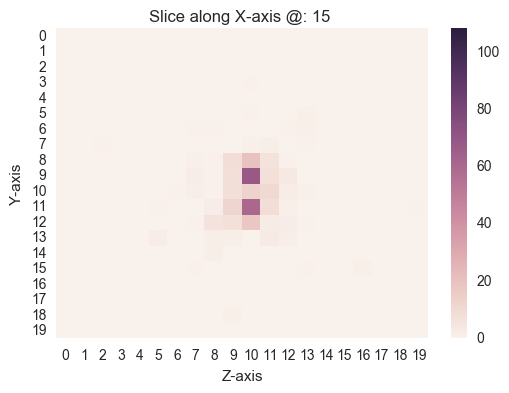

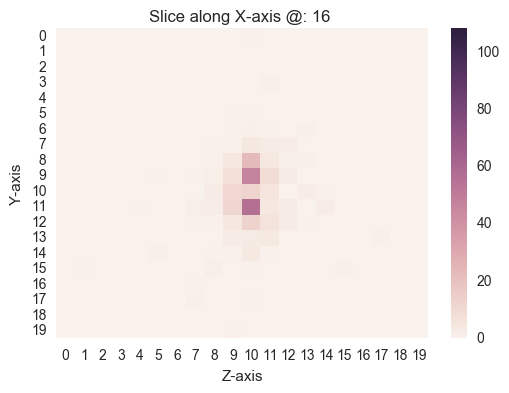

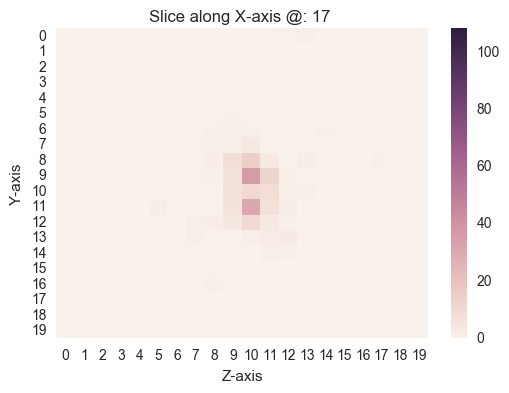

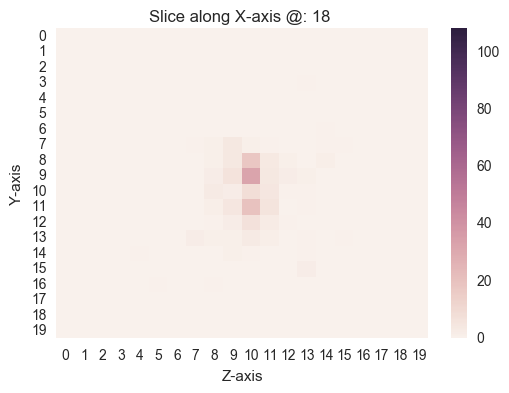

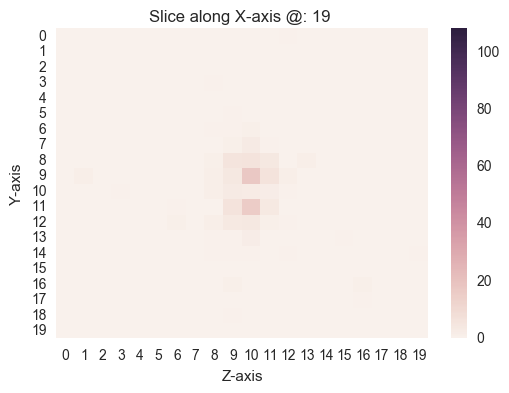

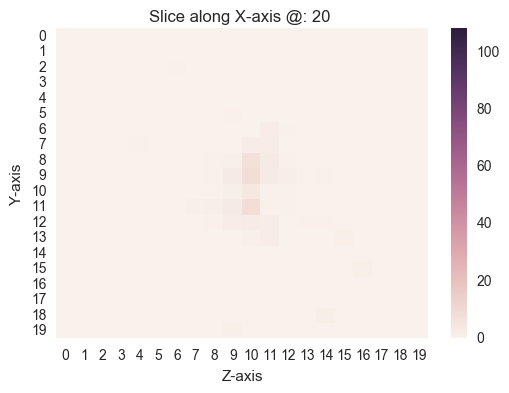

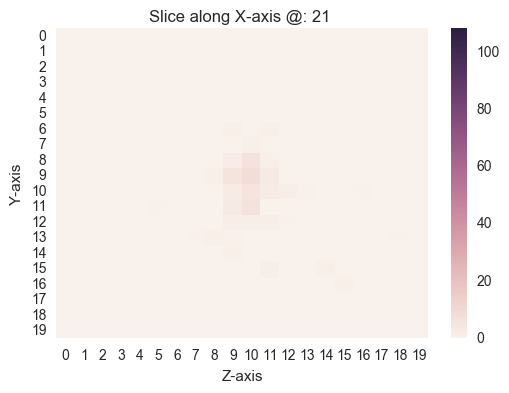

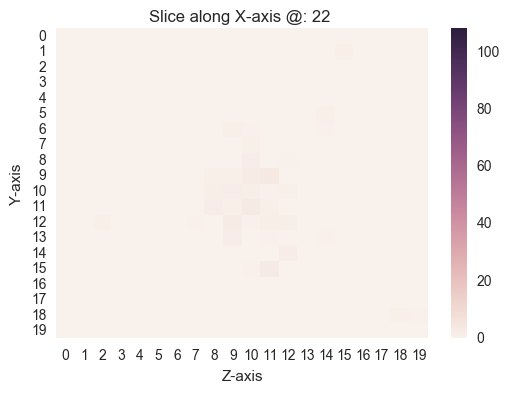

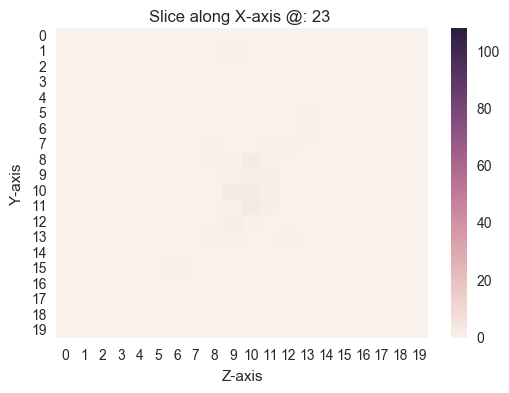

In [47]:
viz_tools.slice_axis_heatmap(np.reshape(x['X_input'][0],(24,20,20)),0)